In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Download the dataset 

In [32]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

train_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

data_dir = pathlib.Path(data_dir)

ValueError: too many values to unpack (expected 2)

In [7]:
data_dir

WindowsPath('C:/Users/Aorus/.keras/datasets/flower_photos')

## Augment the data 

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale= 1 / 255.,
                                            rotation_range = 0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            width_shift_range = 0.2,
                                            height_shift_range = 0.3,
                                            validation_split=0.25,
                                            horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.25,)

## Split the dataset

## Augment the data here

In [40]:
train_data= train_datagen_augmented.flow_from_directory(data_dir,
                                                                   batch_size =32,
                                                                   target_size = (224, 224),
                                                                   subset="training",
                                                                  class_mode = 'categorical',
                                                                  shuffle = True)

valid_data = valid_datagen.flow_from_directory(data_dir,
                                           batch_size = 32,
                                           target_size = (224,224),
                                           subset="validation",    
                                           class_mode = 'categorical',
                                            seed = 42)

Found 2755 images belonging to 5 classes.
Found 915 images belonging to 5 classes.


## Visualize your data 

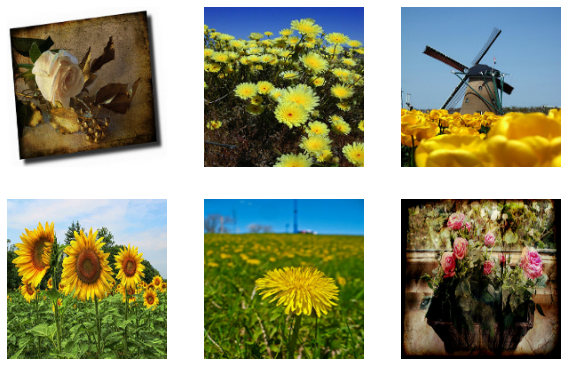

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(classnames[labels[i]])
    plt.axis("off")

## Pick the model from below link

https://keras.io/api/applications/

In [15]:
mobilenet_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model)

9420800/9406464 [==============================] - 1s 0us/step


## Building the model

In [16]:
mobilenet_model.add(Flatten())
mobilenet_model.add(Dense(512, activation='relu'))
mobilenet_model.add(Dense(5, activation='softmax'))

In [17]:
mobilenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 2,916,421
Trainable params: 658,437
Non-trainable params: 2,257,984
_________________________________________________________________


## Training the model

In [41]:
mobilenet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = mobilenet_model.fit(train_data, validation_data=valid_data, epochs=10)

C:\Users\Aorus\anaconda3\envs\tensorflow_exam\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
87/87 [==============================] - 36s 353ms/step - loss: 0.6308 - accuracy: 0.7688 - val_loss: 0.4037 - val_accuracy: 0.8612
Epoch 2/10
87/87 [==============================] - 22s 250ms/step - loss: 0.3856 - accuracy: 0.8563 - val_loss: 0.4522 - val_accuracy: 0.8393
Epoch 3/10
87/87 [==============================] - 21s 243ms/step - loss: 0.3069 - accuracy: 0.8886 - val_loss: 0.3988 - val_accuracy: 0.8612
Epoch 4/10
87/87 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8911

KeyboardInterrupt: 

## - Change the learning rate , add early stopping , save the model 